# Quantum Noise Simulation with Qiskit(AerSimulator Noise Model)
this notebook introduced the quantum noise simulation and how handle it by using qiskit.
In this notbook we will learn:
- What is Quantum noise?
- Type of Quantum Noise?
- How to simulate noise using Qiskit AerSimulator.
- Compare ** ideal simulation vs noisy simulation**
- Result and future Scope.

## What is Quantum Noise?
Quntum noise refers to random disturbance that affect qubit state during computation. since qubit are fragile , they easily lose coherence  or intract with the environment.This caus error in :
- Quantum Gate
- Measurement
- Qubit Idle time(decoherence)
- Quantum Noise is the major obstacle to building large scale quantum computers.

## Types Of Quantum Noise?
1. **Bit-flip Noise**: Randomely flip |0> $ \rightarrow $ |1>
2. **Phase-flip Noise** : Flips the phase of the Qubit |1> $ \rightarrow $ -|1>
3. **Depolarizing noise** : Replace Qubit with a fully mixed state with some probability.
4. **Amplitude Damping Noise** : model energy loss e.g |1> $ \rightarrow $ |0>
5. **Phase Damping Noise** : Destroys the phase information without altering |0> or |1> probability.

## Import Required Qiskit Libraries

In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel,depolarizing_error,amplitude_damping_error,pauli_error,phase_damping_error
from qiskit.visualization import plot_histogram

## Create simple a Qunatum Circuit 

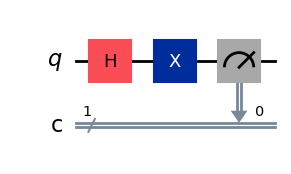

In [2]:
qc= QuantumCircuit(1,1)
qc.h(0)
qc.x(0)
qc.measure(0,0)
qc.draw('mpl')

## Run Ideal Simulation (No Noise)

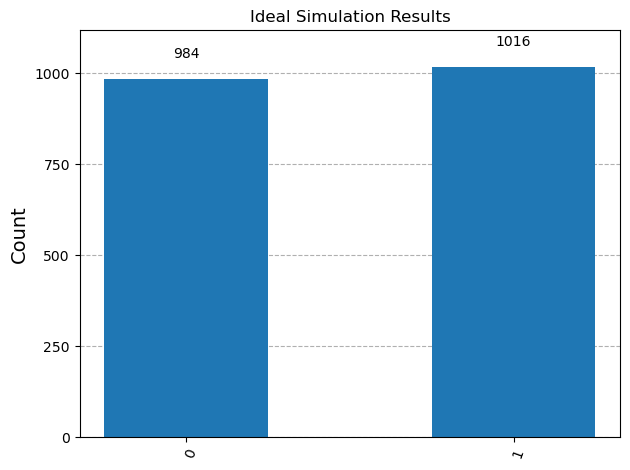

In [6]:
ideal_sim=AerSimulator()
ideal_result=ideal_sim.run(qc,shots=2000).result()
ideal_counts=ideal_result.get_counts()
plot_histogram(ideal_counts,title="Ideal Simulation Results")

## 1. Bit-flip noise
- **What is does** - randomaly flip the qubit :|0> <-->|1>
- **where is error** - Added on quantum gate H and X.
- **Expected change** - the ideal output is **1**.bit-flip noise will convert some result to **0**.


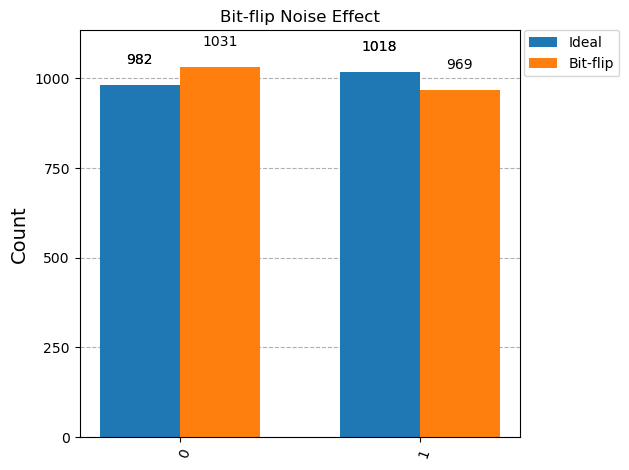

In [5]:
noise_bitflip = NoiseModel()
bitflip =pauli_error([('X',0.1),('I',0.9)]) 
noise_bitflip.add_all_qubit_quantum_error(bitflip,['h','x'])
sim_bf=AerSimulator(noise_model=noise_bitflip)
counts_bf=sim_bf.run(qc,shots=2000).result().get_counts()
plot_histogram([ideal_counts,counts_bf],legend=['Ideal','Bit-flip'],title="Bit-flip Noise Effect")
            

## 1. Phase-flip noise
- **What is does** - randomaly flip the Phase :|1> <-->-|1>
- **where is error** -  on quantum gate H and X.
- **Expected change** - Measurement ignores global phase ,error show up only due to interference change.some output may flip to **0** but fewer than bit-flip


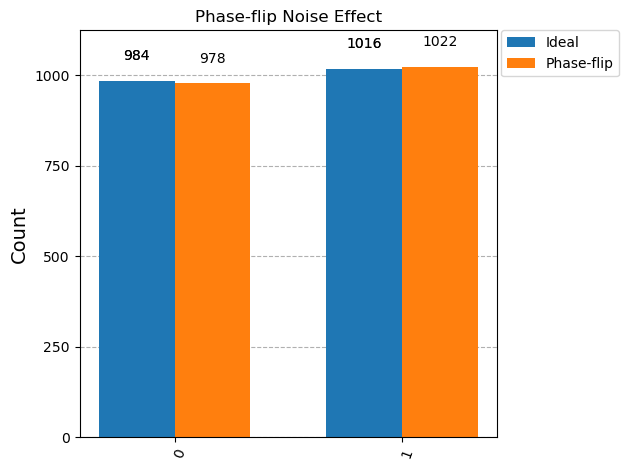

In [8]:
noise_phaseflip = NoiseModel()
phaseflip =pauli_error([('Z',0.1),('I',0.9)]) 
noise_phaseflip.add_all_qubit_quantum_error(phaseflip,['h','x'])
sim_pf=AerSimulator(noise_model=noise_phaseflip)
counts_pf=sim_pf.run(qc,shots=2000).result().get_counts()
plot_histogram([ideal_counts,counts_pf],legend=['Ideal','Phase-flip'],title="Phase-flip Noise Effect")
            

## 3. Depolarizing noise
- **What is does** - Replace Qubit with fully mixed state with probability **p**.
- **where is error** -  on quantum gate.
- **Expected change** - Strong randomness,histogram becomes flatter (0 and 1 more equal).


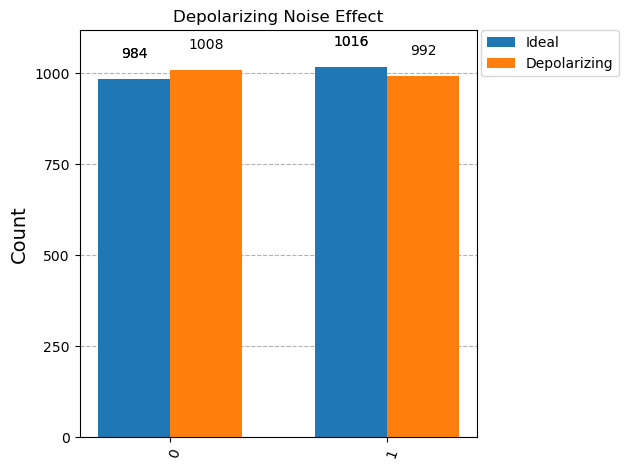

In [10]:
noise_depolarize = NoiseModel()
depolarize_error =depolarizing_error(0.2,1) 
noise_depolarize.add_all_qubit_quantum_error(depolarize_error,['h','x'])
sim_depolarize=AerSimulator(noise_model=noise_depolarize)
counts_depolarize=sim_depolarize.run(qc,shots=2000).result().get_counts()
plot_histogram([ideal_counts,counts_depolarize],legend=['Ideal','Depolarizing'],title="Depolarizing Noise Effect")
            

## 4. Amplitude Damping noise
- **What is does** - Simulates energy decay: |1>-->|0>
- **where is error** - Applied to all gate H and X.
- **Expected change** - Many |1> value decay to |0>.output shifts toward **0** strongly.


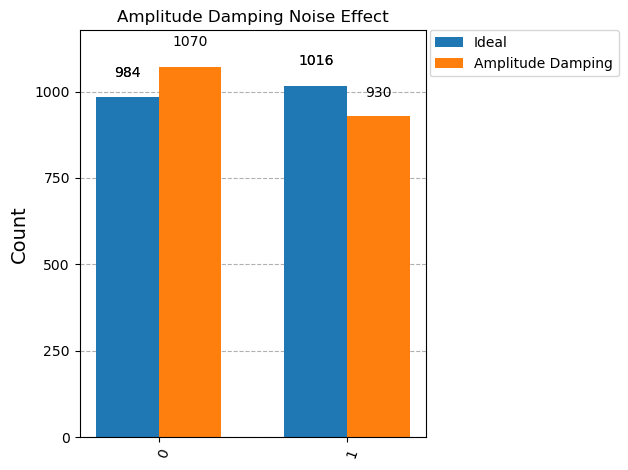

In [11]:
noise_amp = NoiseModel()
amp_error =amplitude_damping_error(0.3) 
noise_amp.add_all_qubit_quantum_error(amp_error,['h','x'])
sim_amp=AerSimulator(noise_model=noise_amp)
counts_amp=sim_amp.run(qc,shots=2000).result().get_counts()
plot_histogram([ideal_counts,counts_amp],legend=['Ideal','Amplitude Damping'],title="Amplitude Damping Noise Effect")
            

## 5. Phase Damping noise
- **What is does** - Destroy phase infirmation without changing probabilities.
- **where is error** -on gate H and X.
- **Expected change** -Break interference --> some randomness ,slight shift toward equal probability.


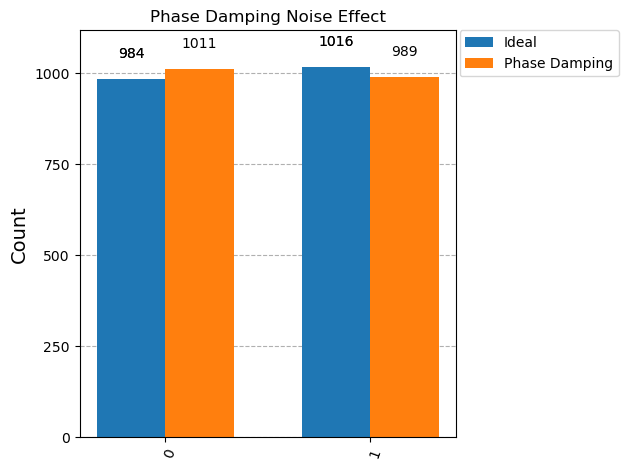

In [12]:
noise_phasedamp = NoiseModel()
phase_damp_error =phase_damping_error(0.3) 
noise_phasedamp.add_all_qubit_quantum_error(phase_damp_error,['h','x'])
sim_pd=AerSimulator(noise_model=noise_phasedamp)
counts_pd=sim_pd.run(qc,shots=2000).result().get_counts()
plot_histogram([ideal_counts,counts_pd],legend=['Ideal','Phase Damping'],title="Phase Damping Noise Effect")
            

In this notbook we learned about quantum noise and how to identify it with there types.it is used for real hardware preparation.these are exact noise types real quantum processor suffer from.this help us to visualize how the circuit output changs when noise is present.**if circuit does not contain noise it show probability for perticular state 100%** .Qiskit Aer noise models mimic IBM Quantum hardware behavior. so you get hand on practical understanding of how real machine behave. 

this is basic building block for understanding before learning **Noise Mitigation** and **Quantum Error Correction**.

---

**Author:** *Shreya Palase*  

**Date Created:**  *12-Dec-2025*

**project:** Quantum-Computing-coding

**File:** day19_QuantumNoise.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>